In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# import matplotlib.patches as mpatches

from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
from sklearn.manifold import TSNE

import seaborn as sns



In [4]:
ria = pd.read_csv('date/data.csv')
ria.drop_duplicates(inplace=True)
ria.head()
print(ria.shape)

(5074, 2)


In [9]:
eco_task = pd.read_csv('ecology_task.csv')
eco_task.dropna(inplace=True)
eco_task.head()
print(eco_task.shape)

(497, 2)


In [10]:
frame = pd.concat([ eco_task, ria],ignore_index=True)
frame.head()
print(frame.shape)

(5571, 2)


In [11]:
import gc
del eco_task, ria
gc.collect()

14

In [12]:
frame.head()

text  label
0    один  из  сотрудников  радиостанции  на  бер...     10
1   вспомните соплодие лопуха – корзинку щетинист...     10
2    во  время  осенней  экскурсии  школьники  шл...     10
3   в настоящее время среди американских растений...     10
4    учащиеся  начальных  классов  собрали  семен...     10

In [2]:
def cv(data):
    count_vectorizer = CountVectorizer()

    embedding = count_vectorizer.fit_transform(data)

    return embedding, count_vectorizer

In [14]:
print(frame.shape)

(5571, 2)


In [25]:
list_corpus = frame["text"].tolist()
list_labels = frame["label"].tolist()
print(len(list_labels))
X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, random_state=40, train_size = 0.5)

X_train_counts, count_vectorizer = cv(X_train)
X_test_counts = count_vectorizer.transform(X_test)

5571


/home/kirilman/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [26]:
from scipy.sparse import csr_matrix

In [27]:
X_test_counts.shape

(2786, 59059)

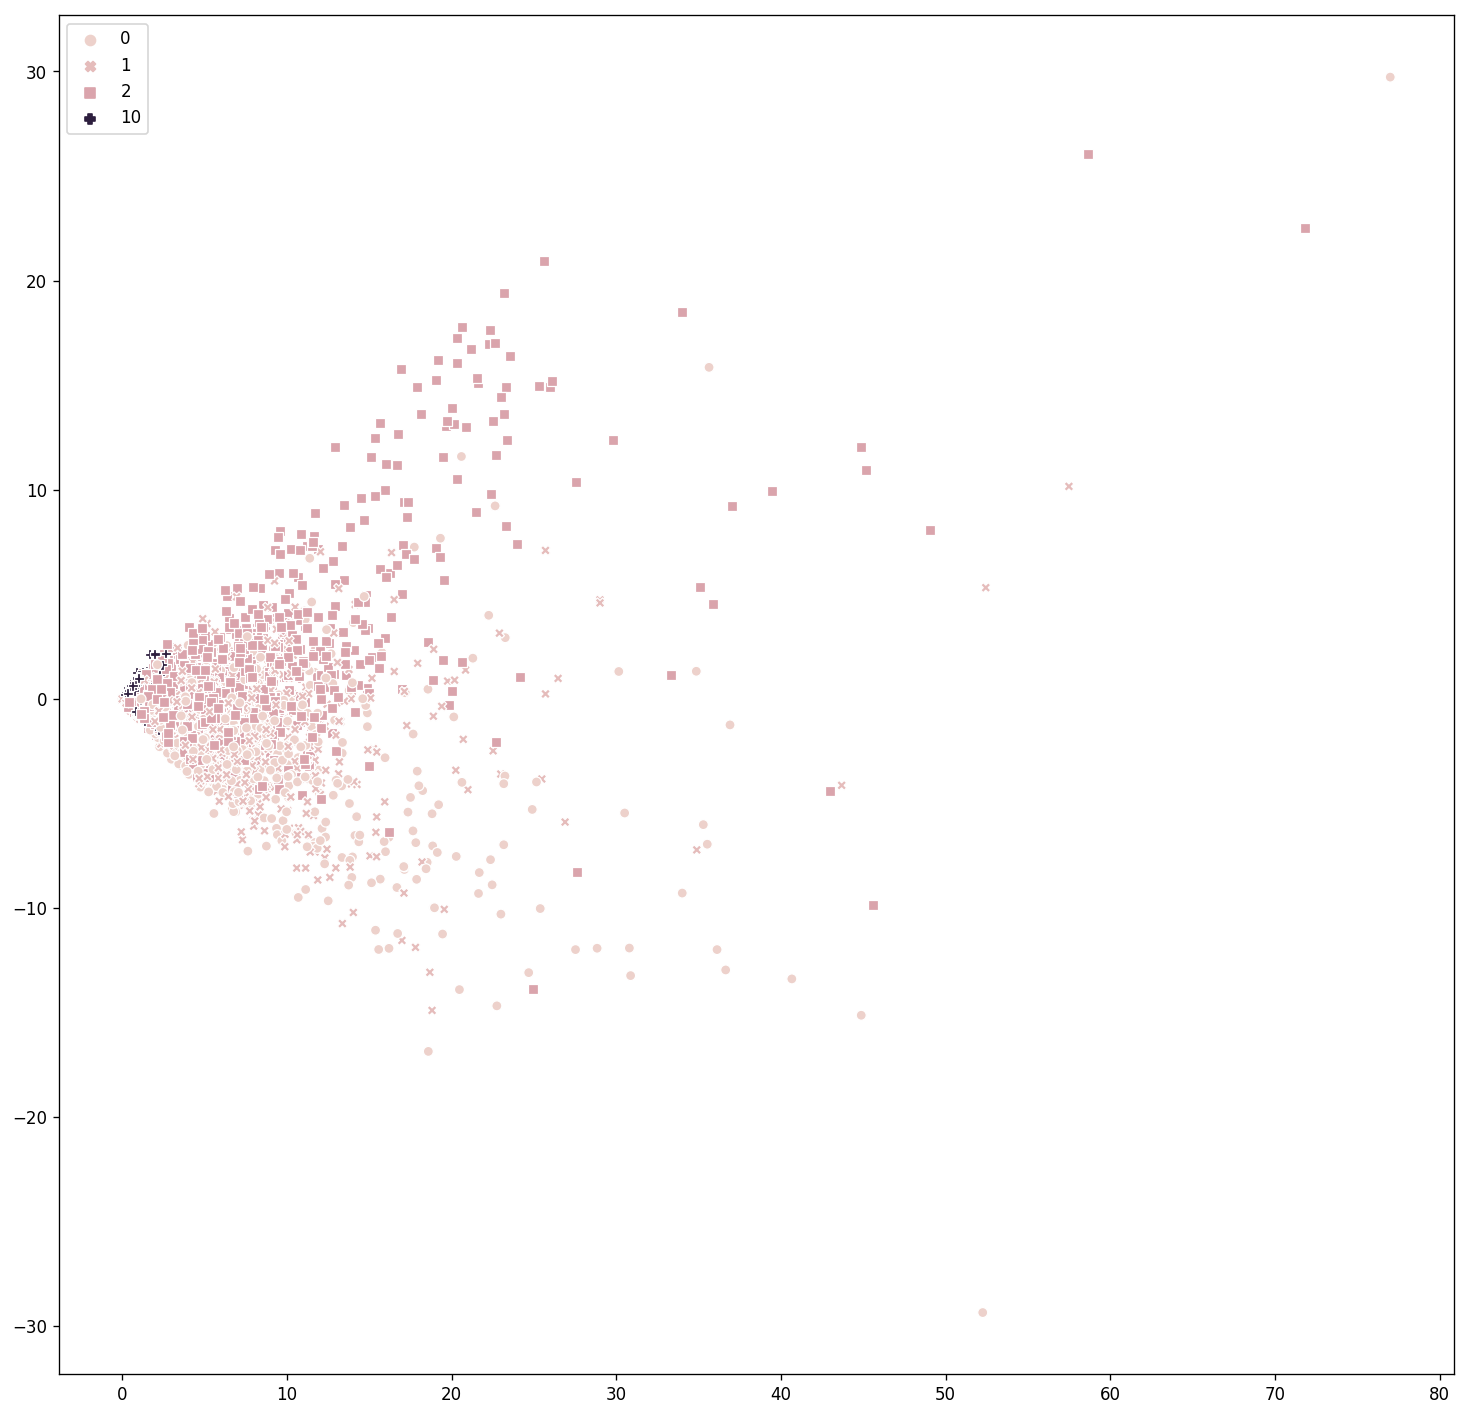

In [28]:
def plot_LSA(test_data, test_labels, plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
#         temp = pd.DataFrame(lsa_scores)
        flatui = ["black", "#3498db", "red", "#e74c3c", "#34495e", "#2ecc71"]
    
        sns.scatterplot(x=lsa_scores[:,0],y=lsa_scores[:,1], legend='full', 
                        cmap="Greens", hue=np.array(test_labels), 
                        style = test_labels, sizes = test_labels,
                       )
#         sns.scatterplot(temp)
#         plt.scatter(lsa_scores[:,0], lsa_scores[:,1], c=test_labels, s = 12 , alpha=0.7,cmap="Spectral")
        
#         color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
#         color_column = [color_mapper[label] for label in test_labels]
#         colors = ['orange','green']
#         if plot:
#             plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels,cmap=color_column)
#             red_patch = mpatches.Patch(color='orange', label='Ria')
#             green_patch = mpatches.Patch(color='green', label='Ecology_task')
#             plt.legend(handles=[red_patch, green_patch], prop={'size': 14})
        plt.legend()
        return lsa_scores
# sns.set_style("whitegrid")
# sns.set(style="ticks")



fig = plt.figure(figsize=(15, 15), dpi = 120)          
r = plot_LSA(X_train_counts, y_train)
plt.show()

In [29]:
# sns.palplot(s)

In [30]:
sns.set_palette(sns.diverging_palette(220, 20, n=7))

In [31]:
X_embedded = TSNE(n_components=2).fit_transform(X_train_counts.toarray())
print(X_embedded.shape, len(y_train))

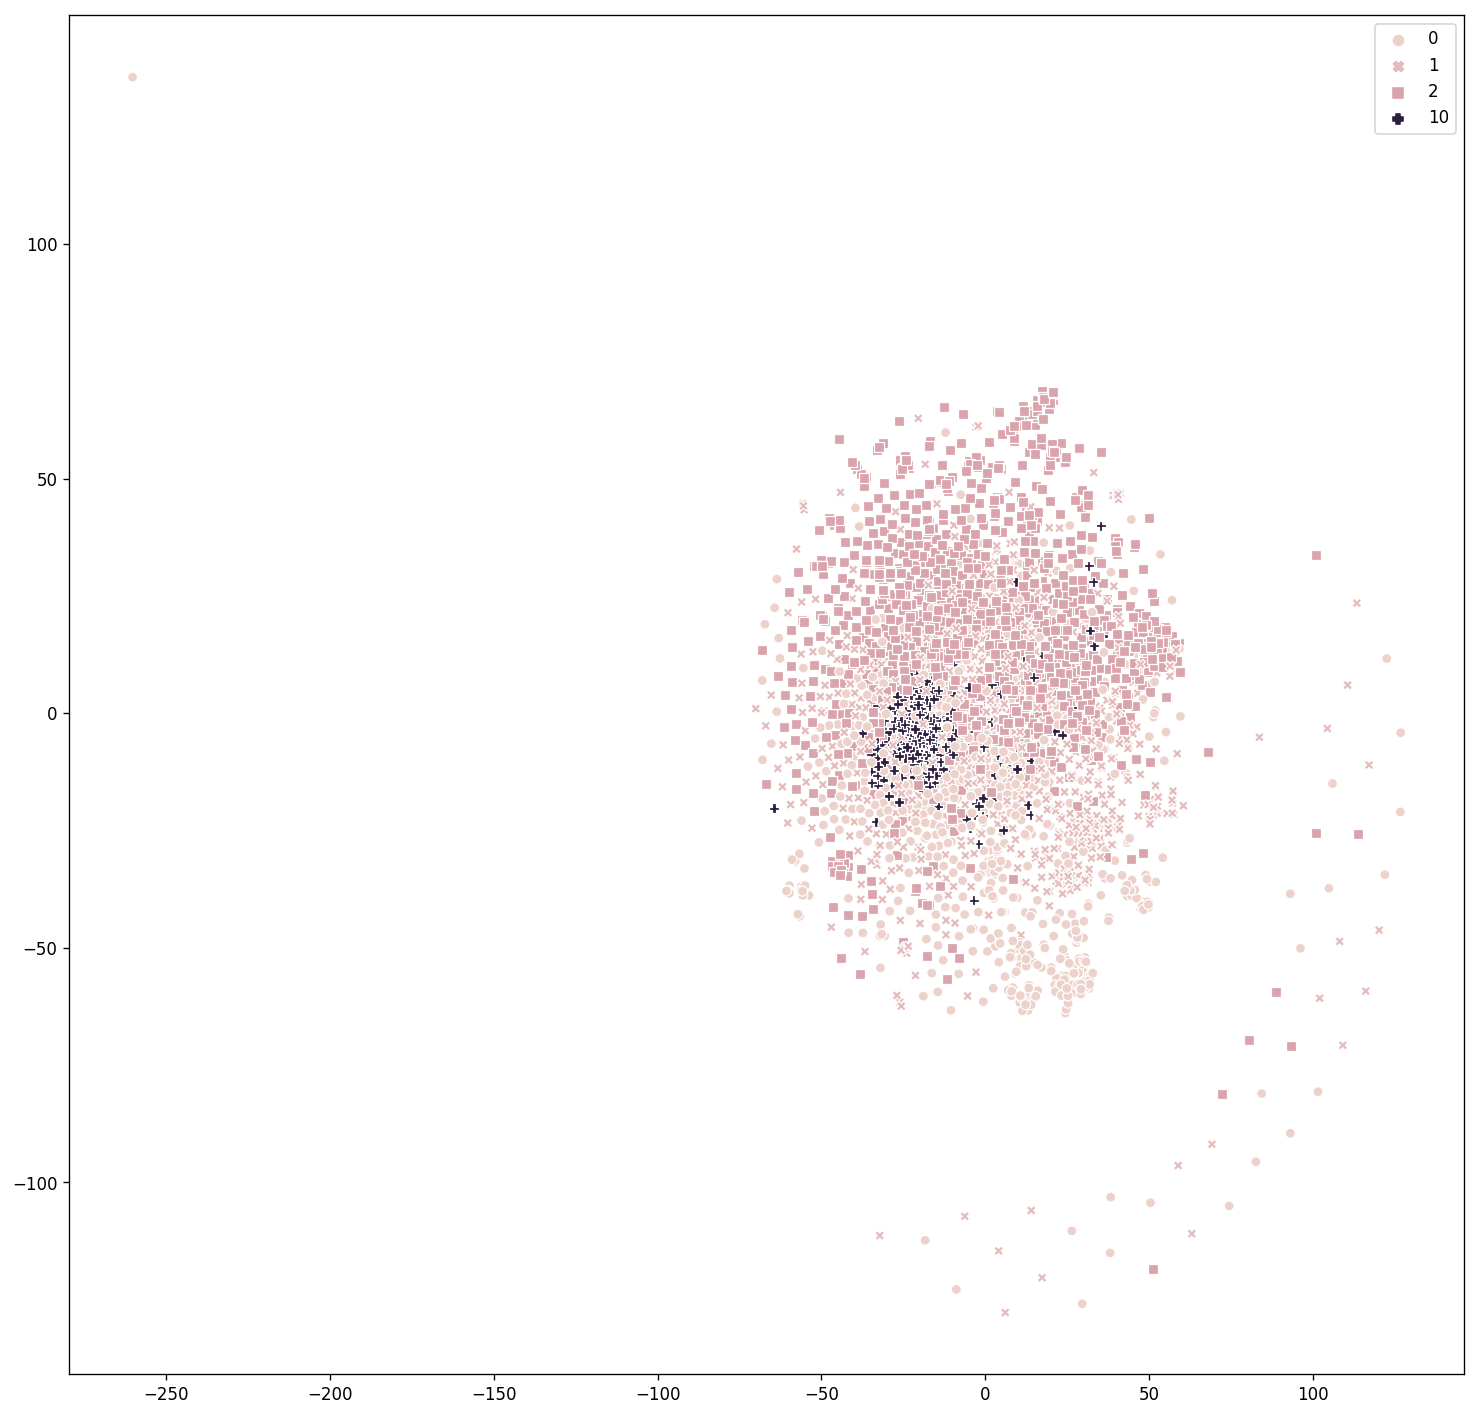

In [38]:
fig = plt.figure(figsize=(15, 15), dpi = 120)          

sns.scatterplot(x=X_embedded[:,0],y=X_embedded[:,1], legend='full', 
                        cmap="Greens", hue=np.array(y_train), 
                        style = y_train, sizes = y_train,
                       )

In [ ]:
np.save('tsne_2.npy',X_embedded)

a = np.load('tsne_2.npy')

np.save('y_train.npy', y_train)

In [53]:
X_embedded = TSNE(n_components=3).fit_transform(X_train_counts.toarray())
print(X_embedded.shape, len(y_train))

(2785, 3) 2785


In [55]:
np.save('tsne_3.npy',X_embedded)

###

In [3]:
ria = pd.read_csv('date/data.csv')
ria.drop_duplicates(inplace=True)
ria.head()
print(ria.shape)

(5074, 2)


In [4]:
eco_task = pd.read_csv('date/eco_task_merge.csv')
print(eco_task.shape)
eco_task.head()

(497, 2)


text  label
0    один  из  сотрудников  радиостанции  на  бер...     10
1   вспомните соплодие лопуха – корзинку щетинист...     10
2    во  время  осенней  экскурсии  школьники  шл...     10
3   в настоящее время среди американских растений...     10
4    учащиеся  начальных  классов  собрали  семен...     10

In [5]:
merge = pd.concat((eco_task[:450],ria[ria.label==0][:450], ria[ria.label == 1][:450]),axis=0)

In [7]:
list_corpus = merge["text"].tolist()
list_labels = merge["label"].tolist()
print(len(list_labels))
# X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, random_state=40, train_size = 1 )


X_train_counts, count_vectorizer = cv(list_corpus)
# X_test_counts = count_vectorizer.transform(list_corpus)

# print(X_test_counts.shape, X_test_counts.shape)

print(X_train_counts.shape)

1350
(1350, 37871)


In [16]:
N = 450

In [9]:
X_embedded_2 = TSNE(n_components=2).fit_transform(X_train_counts.toarray())

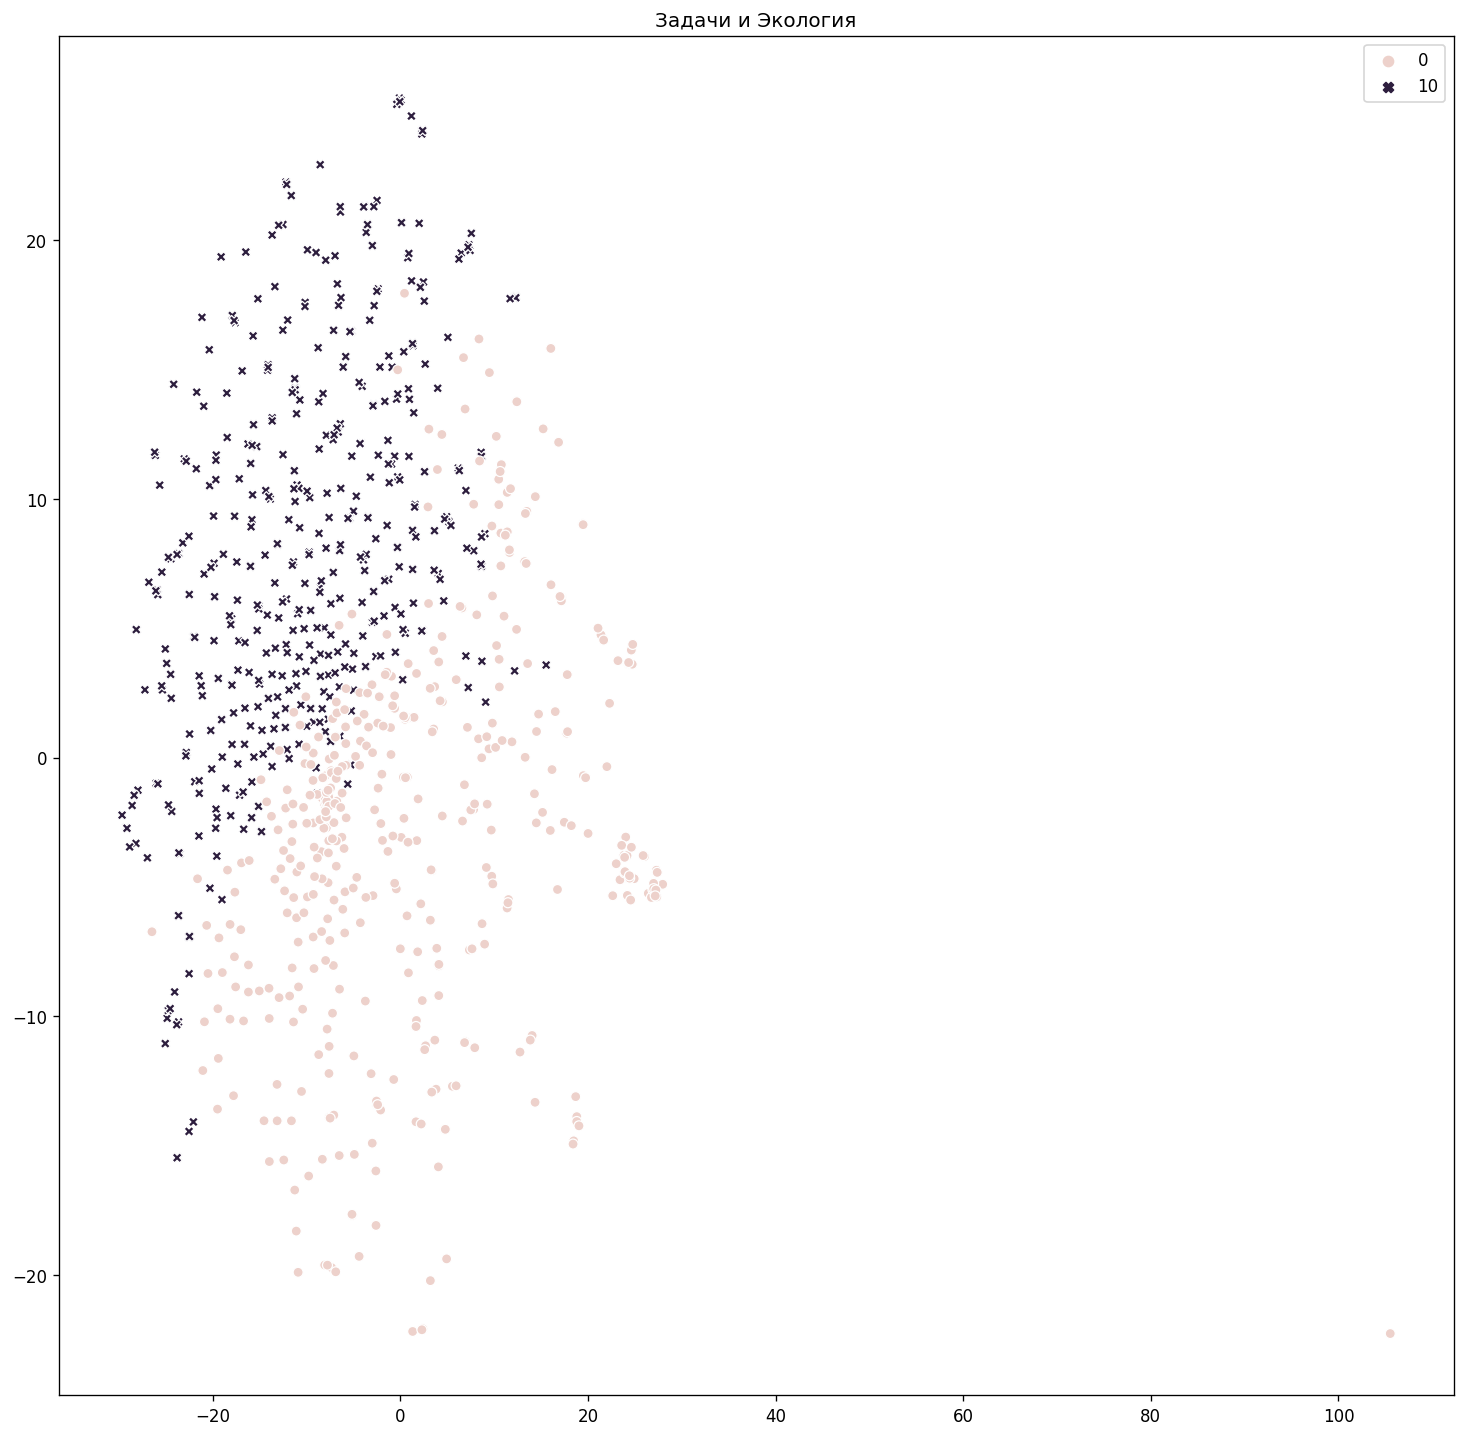

In [52]:
fig = plt.figure(figsize=(15, 15), dpi = 120)          
y_train = np.array(list_labels[:2*N])
plt.title('Задачи и Экология')

sns.scatterplot(x=X_embedded_2[:2*N,0],y=X_embedded_2[:2*N,1], legend='full', 
                        cmap="Greens", hue=np.array(y_train), 
                        style = y_train, sizes = y_train,
                       )

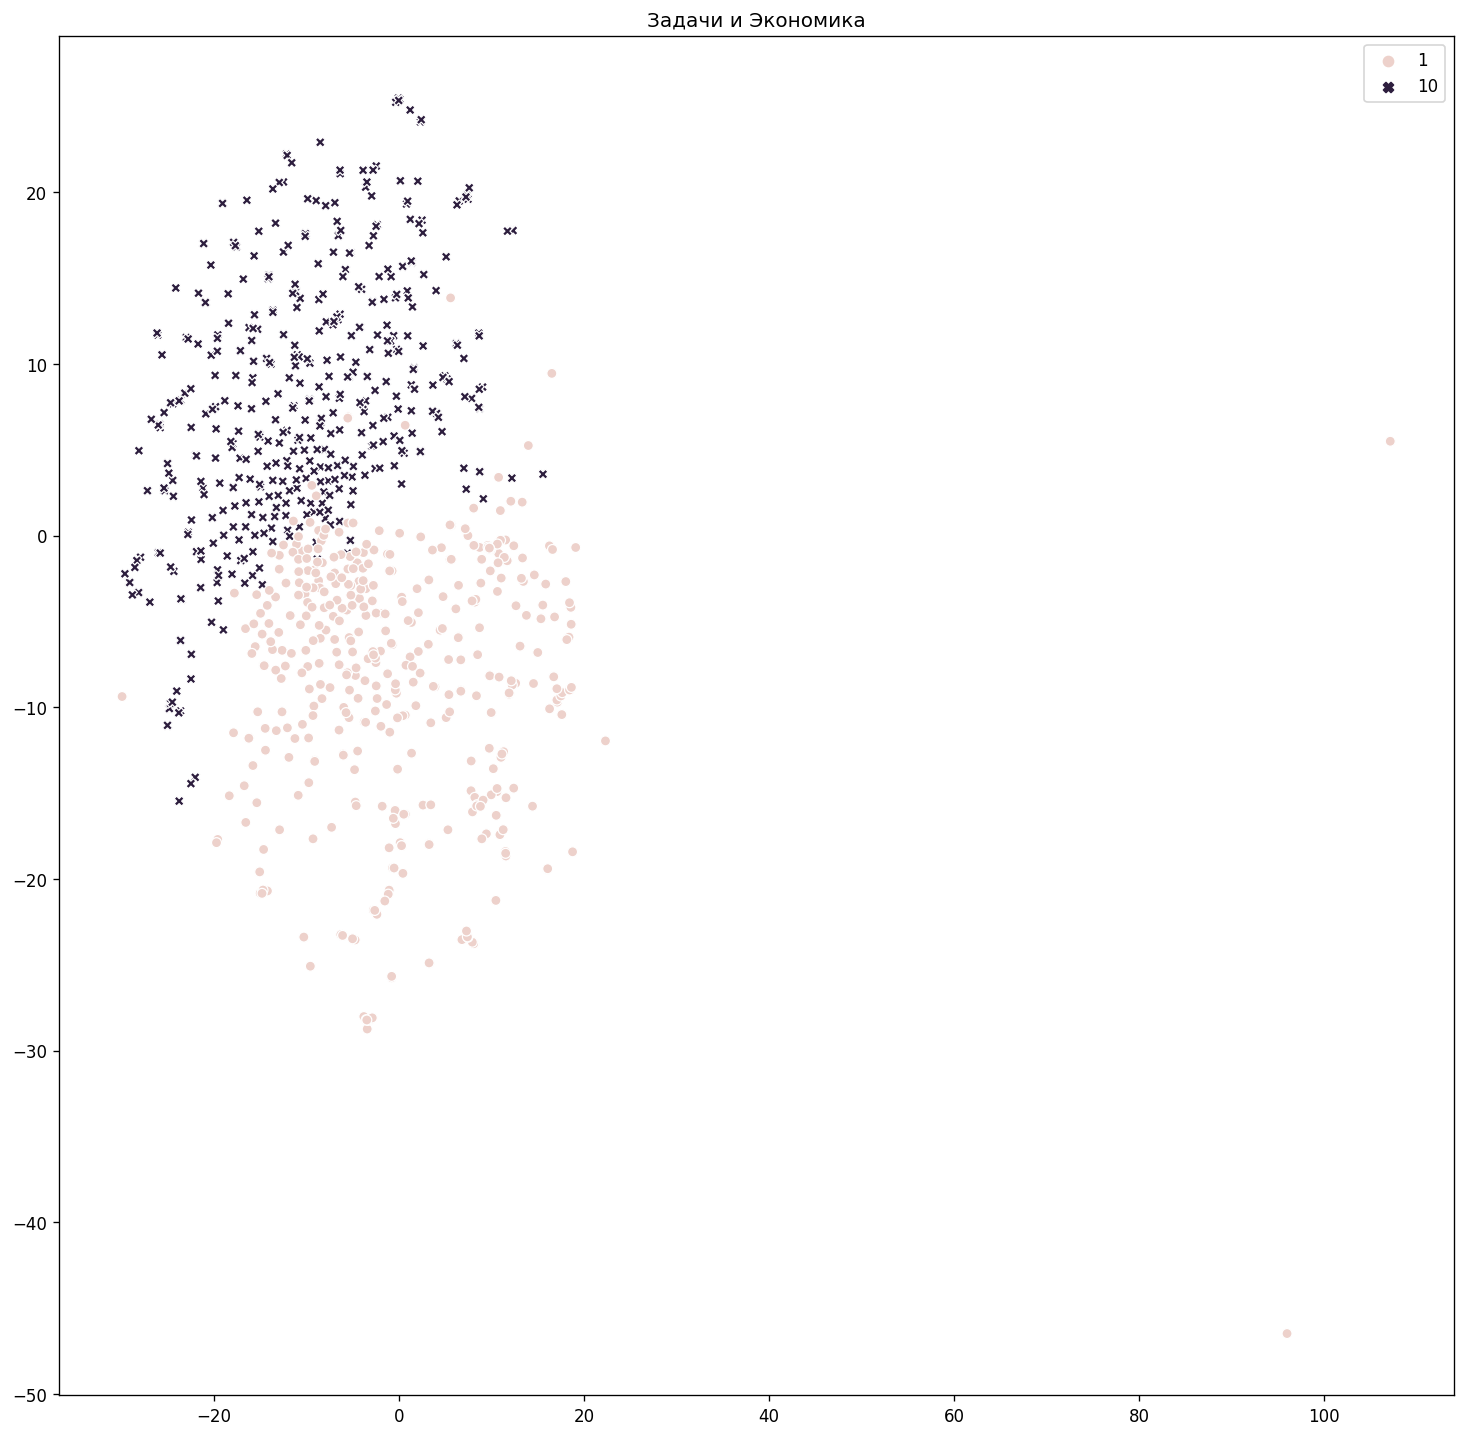

In [57]:
fig = plt.figure(figsize=(15, 15), dpi = 120)          
y_train = np.array(list_labels[:N] + list_labels[2*N:])

index = np.array(list_labels)
indx = np.where(index!= 0)[0]
plt.title('Задачи и Экономика')
sns.scatterplot(x=X_embedded_2[indx,0],y=X_embedded_2[indx,1], legend='full', 
                        cmap="Greens", hue=np.array(y_train), 
                        style = y_train, sizes = y_train,
                       )

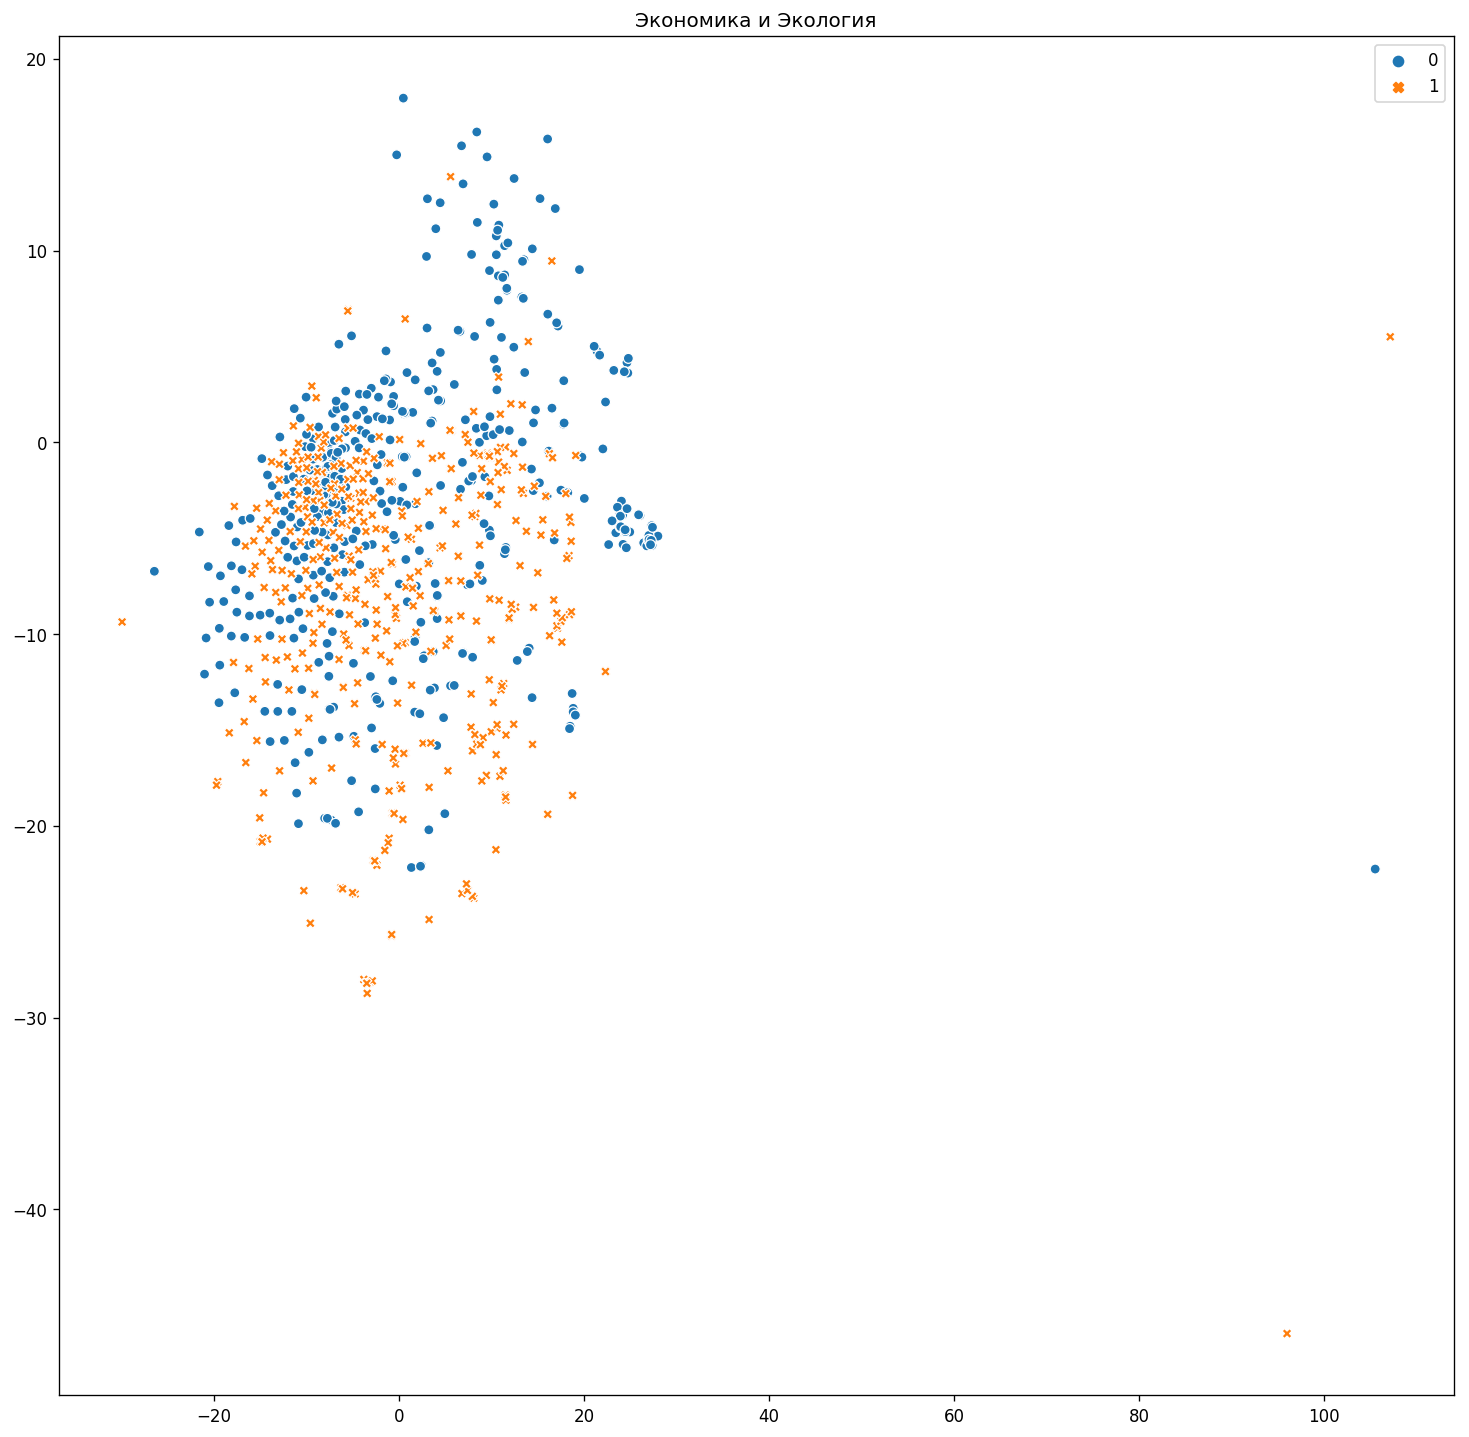

In [54]:
fig = plt.figure(figsize=(15, 15), dpi = 120)          
y_train = np.array(list_labels[N:])

index = np.array(list_labels)
indx = np.where(index!= 10)[0]

plt.title('Экономика и Экология')

sns.scatterplot(x=X_embedded_2[indx,0],y=X_embedded_2[indx,1], legend='full', 
                        cmap="Greens", hue=np.array(y_train), 
                        style = y_train, sizes = y_train,
                       )